In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2 单变量的线性回归
题目要求：根据城市人口数量，预测开小吃店的利润
（数据结构：第一列为城市人口数量，第二列为该城市小吃店利润）

In [8]:
#导入数据
path = '/Users/hanhuaxing/Desktop/GongLab/Code/Studying/吴恩达机器学习课后练习/ex1data1.txt'
data = pd.read_csv(filepath_or_buffer=path,names=['Population','Profits'])
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


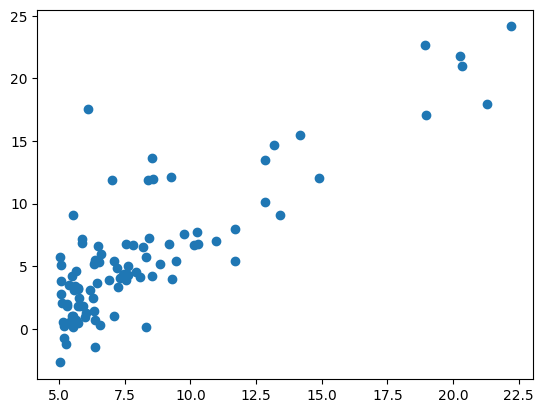

In [9]:
# 提取x,y,plot data
x = data['Population']
y = data['Profits']
plt.scatter(x,y)

In [10]:
# Model Function f_wb + Compute Cost compute_cost(x,y,w,b)
def compute_cost(x,y,w,b):

    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        cost = cost + (f_wb-y[i])**2
    total_cost = 1/(2*m)*cost

    return total_cost

In [11]:
# Copmute gradient
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw_i = (f_wb-y[i])*x[i]
        dj_db_i = f_wb-y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw,dj_db

In [12]:
# compue gradient descent

def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    J_his = []
    p_his = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
        J_his.append(cost_function(x,y,w,b))
        p_his.append([w,b])
    
    return w, b, J_his, p_his

In [13]:
#应用于 预测城市人口和小吃店利润
x = data['Population']
y = data['Profits']
w_init = 0
b_init = 0
iters = 10000
alpha = 0.01
m = x.shape[0]

final_w,final_b,J,p = gradient_descent(x,y,w_init,b_init,alpha,iters,compute_cost,compute_gradient)
print(final_w,final_b)

1.1930336383584828 -3.895780820268237


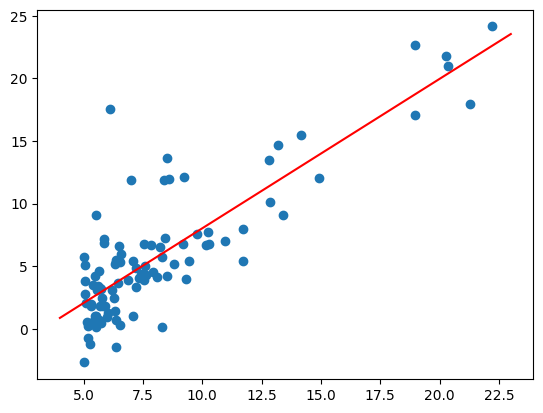

In [15]:
# Visulaize

# 原始数据
x = data['Population']
y = data['Profits']
plt.scatter(x,y)
plt.plot

# 拟合直线
x_hat = range(4,24)
y_hat = final_w*x_hat+final_b
plt.plot(x_hat,y_hat,color='red')
